<a href="https://colab.research.google.com/github/Anudeep181104/DAUP/blob/main/Week_1_Wed_30_07_docx_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Data Overview ===
Length of data: 10
Data type of CompletionTime: int64
Data type of Category: category

=== Frequency of Each Category ===
Category
Fast Learner     3
On Time          4
Needs Support    3
Name: count, dtype: int64

=== Proportion of Each Category ===
Category
Fast Learner     30.0
On Time          40.0
Needs Support    30.0
Name: proportion, dtype: float64

=== Descriptive Statistics ===
Mean Completion Time: 27.90 hours
Median Completion Time: 28.50 hours
Standard Deviation: 4.63 hours
Pass Rate: 7/10 students passed

Enter new threshold for 'On Time' (default = 30): 30


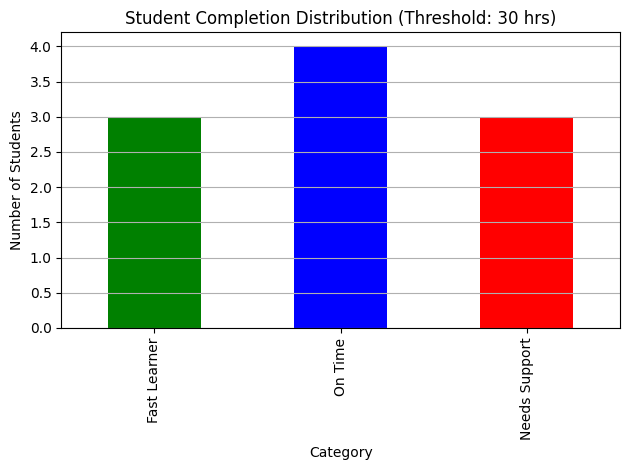

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Data Creation & Categorization
# -----------------------------
# Sample completion times for 10 students (in hours)
completion_times = [22, 28, 35, 31, 26, 24, 33, 29, 21, 30]

# Default threshold
default_threshold = 30

# Categorization function
def categorize_time(hours, threshold=default_threshold):
    if hours < 25:
        return "Fast Learner"
    elif 25 <= hours <= threshold:
        return "On Time"
    else:
        return "Needs Support"

# Apply categorization
categories = [categorize_time(time) for time in completion_times]

# Create DataFrame
df = pd.DataFrame({
    "CompletionTime": completion_times,
    "Category": pd.Categorical(categories, categories=["Fast Learner", "On Time", "Needs Support"], ordered=True)
})

# -----------------------------
# 2. Data Operations
# -----------------------------
print("=== Data Overview ===")
print("Length of data:", len(df))
print("Data type of CompletionTime:", df["CompletionTime"].dtype)
print("Data type of Category:", df["Category"].dtype)

print("\n=== Frequency of Each Category ===")
print(df["Category"].value_counts().sort_index())

print("\n=== Proportion of Each Category ===")
print(df["Category"].value_counts(normalize=True).sort_index() * 100)

# -----------------------------
# 3. Descriptive Statistics
# -----------------------------
mean_time = df["CompletionTime"].mean()
median_time = df["CompletionTime"].median()
std_dev = df["CompletionTime"].std()
pass_count = df[df["Category"].isin(["Fast Learner", "On Time"])].shape[0]

print("\n=== Descriptive Statistics ===")
print(f"Mean Completion Time: {mean_time:.2f} hours")
print(f"Median Completion Time: {median_time:.2f} hours")
print(f"Standard Deviation: {std_dev:.2f} hours")
print(f"Pass Rate: {pass_count}/10 students passed")

# -----------------------------
# 4. Advanced: Dynamic Threshold & Visualization
# -----------------------------
# Input for custom threshold
custom_threshold = int(input("\nEnter new threshold for 'On Time' (default = 30): ") or 30)

# Re-categorization based on new threshold
def dynamic_categorize(hours, threshold):
    if hours < 25:
        return "Fast Learner"
    elif 25 <= hours <= threshold:
        return "On Time"
    else:
        return "Needs Support"

# Update DataFrame
df["Updated_Category"] = pd.Categorical(
    [dynamic_categorize(t, custom_threshold) for t in df["CompletionTime"]],
    categories=["Fast Learner", "On Time", "Needs Support"], ordered=True
)

# Visualization
category_counts = df["Updated_Category"].value_counts().sort_index()
category_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title(f"Student Completion Distribution (Threshold: {custom_threshold} hrs)")
plt.xlabel("Category")
plt.ylabel("Number of Students")
plt.grid(axis='y')
plt.tight_layout()
plt.show()